In [1]:
import re, nltk

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from wordcloud import WordCloud
from PIL import Image

In [79]:
with open("quovadis.txt") as myfile:
    data = " ".join(line.rstrip() for line in myfile)

In [80]:
print(data[:200])

The Project Gutenberg EBook of Quo Vadis, by Henryk Sienkiewicz  This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever.  You may copy it, give it away or r


In [81]:
# ?nltk

In [82]:
subbed = re.sub(r"[^\w']+", " ", data).lower()
subbed = re.sub(r"'", " '", subbed)

In [83]:
print(subbed[:250])

the project gutenberg ebook of quo vadis by henryk sienkiewicz this ebook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever you may copy it give it away or re use it under the terms of the project gutenberg licen


In [84]:
stopWords = set(nltk.corpus.stopwords.words('english'))

In [85]:
text = subbed.split(" ")

In [86]:
text = [w for w in text if w not in stopWords and len(w) > 1 and w[0] != "'"]

In [87]:
print(text[:250])

['project', 'gutenberg', 'ebook', 'quo', 'vadis', 'henryk', 'sienkiewicz', 'ebook', 'use', 'anyone', 'anywhere', 'cost', 'almost', 'restrictions', 'whatsoever', 'may', 'copy', 'give', 'away', 'use', 'terms', 'project', 'gutenberg', 'license', 'included', 'ebook', 'online', 'www', 'gutenberg', 'org', 'title', 'quo', 'vadis', 'narrative', 'time', 'nero', 'author', 'henryk', 'sienkiewicz', 'translator', 'jeremiah', 'curtin', 'posting', 'date', 'december', '31', '2008', 'ebook', '2853', 'release', 'date', 'october', '2001', 'last', 'updated', 'november', '19', '2016', 'language', 'english', 'character', 'set', 'encoding', 'utf', 'start', 'project', 'gutenberg', 'ebook', 'quo', 'vadis', 'produced', 'david', 'reed', 'quo', 'vadis', 'narrative', 'time', 'nero', 'henryk', 'sienkiewicz', 'translated', 'polish', 'jeremiah', 'curtin', 'auguste', 'comte', 'san', 'francisco', 'cal', 'dear', 'friend', 'classmate', 'beg', 'dedicate', 'volume', 'jeremiah', 'curtin', 'introductory', 'trilogy', 'fire', 

In [88]:
count = {}
for word in text:
    count.setdefault(word, 0)
    count[word] = count[word] + 1

In [89]:
counts_list = [(word, c) for word, c in zip(count.keys(), count.values())]
counts_list.sort(key = lambda x: x[1], reverse=True)
print(counts_list)

[('thou', 119), ('petronius', 103), ('lygia', 85), ('aulus', 82), ('thee', 79), ('vinicius', 75), ('one', 69), ('cæsar', 67), ('house', 67), ('said', 64), ('time', 58), ('pomponia', 54), ('would', 53), ('thy', 49), ('nero', 46), ('know', 45), ('man', 40), ('people', 39), ('even', 39), ('eyes', 36), ('since', 34), ('plautius', 33), ('life', 32), ('began', 32), ('might', 31), ('old', 31), ('moment', 31), ('hast', 30), ('little', 29), ('like', 29), ('give', 28), ('command', 28), ('could', 27), ('young', 27), ('love', 27), ('heard', 26), ('answered', 26), ('though', 25), ('also', 24), ('certain', 23), ('maiden', 22), ('general', 22), ('hence', 21), ('hand', 21), ('art', 21), ('something', 21), ('death', 21), ('great', 20), ('two', 20), ('beautiful', 20), ('tell', 20), ('head', 20), ('looked', 19), ('face', 19), ('us', 18), ('wish', 18), ('yet', 17), ('called', 17), ('city', 17), ('gods', 17), ('rome', 17), ('true', 17), ('every', 17), ('long', 17), ('daughter', 17), ('gave', 17), ('words',

In [90]:
counts_list[0:48]

[('thou', 119),
 ('petronius', 103),
 ('lygia', 85),
 ('aulus', 82),
 ('thee', 79),
 ('vinicius', 75),
 ('one', 69),
 ('cæsar', 67),
 ('house', 67),
 ('said', 64),
 ('time', 58),
 ('pomponia', 54),
 ('would', 53),
 ('thy', 49),
 ('nero', 46),
 ('know', 45),
 ('man', 40),
 ('people', 39),
 ('even', 39),
 ('eyes', 36),
 ('since', 34),
 ('plautius', 33),
 ('life', 32),
 ('began', 32),
 ('might', 31),
 ('old', 31),
 ('moment', 31),
 ('hast', 30),
 ('little', 29),
 ('like', 29),
 ('give', 28),
 ('command', 28),
 ('could', 27),
 ('young', 27),
 ('love', 27),
 ('heard', 26),
 ('answered', 26),
 ('though', 25),
 ('also', 24),
 ('certain', 23),
 ('maiden', 22),
 ('general', 22),
 ('hence', 21),
 ('hand', 21),
 ('art', 21),
 ('something', 21),
 ('death', 21),
 ('great', 20)]

In [97]:
wc_dict = {w: c for w,c in counts_list[0:72]}

In [98]:
mask = np.array(Image.open("storm.png"))

In [99]:
cloud = WordCloud(background_color="white", mask=mask, max_words=100)

In [100]:
cloud.generate_from_frequencies(wc_dict)

(-0.5, 980.5, 835.5, -0.5)

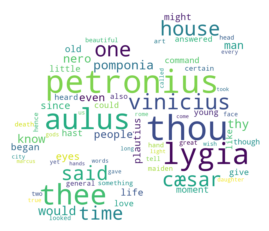

In [101]:
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")

In [102]:
cloud.to_file("long_cloud.png")

In [78]:
?WordCloud